# Exercise window functions: compute the cummulative number of cases across time, per diet group

The variable `toevent` contains the time that patients where followed up. We want to calculate the number of events as a function of the follow-up time, per group separatedely. We expect that, if the mediterranean diet has an effect, then there will be more cases appearing over time for the control groups in comparison to the other diet groups. 

Here is how to proceed:
- Use a window function to compute the cummulative number of events for each diet group separatedly. As we are interested in the follow-up time, you need to sort the events by the follow-up time first (`toevent`), and then calcualte the cummulative number of event per group.
- Add the result as a new column called `'cummulative_event_count'`

With your new awesome vectorization skills, these two steps  should take only one line!

When ready, execute the code at the end, which should make a visualization with the cummulative number of cases per group, as a function of the time of follow-up.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load patient data

In [2]:
df = pd.read_csv('processed_data_predimed.csv')
df['event'] = df['event'].map({'Yes': 1, 'No': 0})
df

,patient-id,location-id,sex,age,smoke,bmi,waist,wth,htn,diab,hyperchol,famhist,hormo,p14,toevent,event,group
0,1,1,Female,77,Never,25.92,94,0.657343,Yes,No,Yes,Yes,No,9,5.538672,0,MedDiet + VOO
1,2,1,Female,68,Never,34.85,150,0.949367,Yes,No,Yes,Yes,NaN,10,3.063655,0,MedDiet + Nuts
2,3,1,Female,66,Never,37.50,120,0.750000,Yes,Yes,No,No,No,6,5.590691,0,MedDiet + Nuts
3,4,1,Female,77,Never,29.26,93,0.628378,Yes,Yes,No,No,No,6,5.456537,0,MedDiet + VOO
4,5,1,Female,60,Never,30.02,104,0.662420,Yes,No,Yes,No,No,9,2.746064,0,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6240,1253,5,Male,79,Never,25.28,105,0.640244,Yes,No,Yes,No,No,8,5.828884,0,MedDiet + VOO
6241,1254,5,Male,62,Former,27.10,104,0.594286,Yes,No,Yes,Yes,No,9,5.067762,0,MedDiet + Nuts
6242,1255,5,Female,65,Never,35.02,103,0.686667,Yes,No,Yes,No,No,10,1.993155,0,MedDiet + VOO
6243,1256,5,Male,61,Never,28.42,94,0.576687,Yes,Yes,No,No,No,9,2.039699,0,MedDiet + Nuts


In [3]:
# calculate cummulative number of cases across time, independently for each group
df['cummulative_event_count'] = df.sort_values('toevent').groupby('group')['event'].cumsum()
df

,patient-id,location-id,sex,age,smoke,bmi,waist,wth,htn,diab,hyperchol,famhist,hormo,p14,toevent,event,group,cummulative_event_count
0,1,1,Female,77,Never,25.92,94,0.657343,Yes,No,Yes,Yes,No,9,5.538672,0,MedDiet + VOO,73
1,2,1,Female,68,Never,34.85,150,0.949367,Yes,No,Yes,Yes,NaN,10,3.063655,0,MedDiet + Nuts,35
2,3,1,Female,66,Never,37.50,120,0.750000,Yes,Yes,No,No,No,6,5.590691,0,MedDiet + Nuts,61
3,4,1,Female,77,Never,29.26,93,0.628378,Yes,Yes,No,No,No,6,5.456537,0,MedDiet + VOO,73
4,5,1,Female,60,Never,30.02,104,0.662420,Yes,No,Yes,No,No,9,2.746064,0,Control,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6240,1253,5,Male,79,Never,25.28,105,0.640244,Yes,No,Yes,No,No,8,5.828884,0,MedDiet + VOO,74
6241,1254,5,Male,62,Former,27.10,104,0.594286,Yes,No,Yes,Yes,No,9,5.067762,0,MedDiet + Nuts,57
6242,1255,5,Female,65,Never,35.02,103,0.686667,Yes,No,Yes,No,No,10,1.993155,0,MedDiet + VOO,27
6243,1256,5,Male,61,Never,28.42,94,0.576687,Yes,Yes,No,No,No,9,2.039699,0,MedDiet + Nuts,16


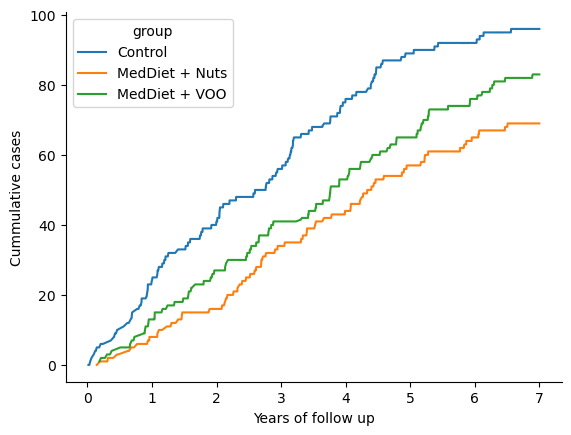

In [9]:
sns.lineplot(data=df.sort_values('toevent'), x='toevent', y='cummulative_event_count', hue='group')
plt.ylabel('Cummulative cases')
plt.xlabel('Years of follow up')
sns.despine()

#### Optional exercise

Redo the plot but with the cummulative *percentage* of cases. For that you need to divide the cummulative count by the total number of cases in each group. 

In [5]:
# we calculate the number of cases per group, and save them in a dictionary
n_dict = df.groupby('group')['cummulative_event_count'].count().to_dict()
n_dict

{'Control': 2016, 'MedDiet + Nuts': 2077, 'MedDiet + VOO': 2152}

In [6]:
# we assign now the N to eaach group, to later divide it in vector form
df['N'] = df['group'].map(n_dict)
df

,patient-id,location-id,sex,age,smoke,bmi,waist,wth,htn,diab,hyperchol,famhist,hormo,p14,toevent,event,group,cummulative_event_count,N
0,1,1,Female,77,Never,25.92,94,0.657343,Yes,No,Yes,Yes,No,9,5.538672,0,MedDiet + VOO,73,2152
1,2,1,Female,68,Never,34.85,150,0.949367,Yes,No,Yes,Yes,NaN,10,3.063655,0,MedDiet + Nuts,35,2077
2,3,1,Female,66,Never,37.50,120,0.750000,Yes,Yes,No,No,No,6,5.590691,0,MedDiet + Nuts,61,2077
3,4,1,Female,77,Never,29.26,93,0.628378,Yes,Yes,No,No,No,6,5.456537,0,MedDiet + VOO,73,2152
4,5,1,Female,60,Never,30.02,104,0.662420,Yes,No,Yes,No,No,9,2.746064,0,Control,50,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6240,1253,5,Male,79,Never,25.28,105,0.640244,Yes,No,Yes,No,No,8,5.828884,0,MedDiet + VOO,74,2152
6241,1254,5,Male,62,Former,27.10,104,0.594286,Yes,No,Yes,Yes,No,9,5.067762,0,MedDiet + Nuts,57,2077
6242,1255,5,Female,65,Never,35.02,103,0.686667,Yes,No,Yes,No,No,10,1.993155,0,MedDiet + VOO,27,2152
6243,1256,5,Male,61,Never,28.42,94,0.576687,Yes,Yes,No,No,No,9,2.039699,0,MedDiet + Nuts,16,2077


In [7]:
# divide, vectorized
df['cummulative_incidence'] = df['cummulative_event_count'] / df['N']

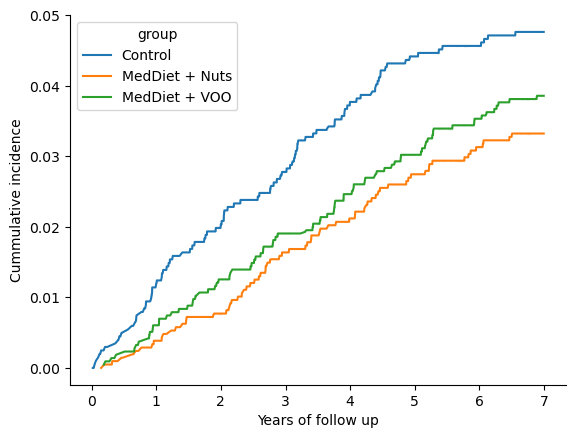

In [10]:
sns.lineplot(data=df.sort_values('toevent'), x='toevent', y='cummulative_incidence', hue='group')
plt.ylabel('Cummulative incidence')
plt.xlabel('Years of follow up')
sns.despine()